# Agent-based Modeling: Covid-19

This notebook contains an implementation of our Covid-19 simulation using agent-based modeling. We want to demonstrate how the spread of the virus affects our society. The model was implemented using [BPTK_Py](https://bptk.transentis-labs.com/en/latest/docs/api/api_overview.html#). This framework not only enables us to do agent-based modeling, it can also manage simulation scenarios easily.

In [2]:
from BPTK_Py.bptk import bptk

bptk = bptk()

The assumptions are based on the current situation in Germany. With this model, the goal is to figure out the amount of people an infected person infects over a certain period of time. One person is equivalent to one agent.

__Assumptions__

_Model_
- Contact Rate: 20 persons. Defines how many people a person encounters per day in average.
- Infectivity: 0.7%. Defines the probability that a person becomes infected after contact with an infectious person.

_Agent_
- All agents can get infected.
- One agent can have the following states: `HEALTHY`, `INFECTED WITH NO/LIGHT SYMPTOMS`, `INFECTED WITH STRONG SYMPTOMS`
- Only agents with no/light symptoms can infect other agents. Agents with strong symptoms "stay at home/ are in quarantine" and cannot infect other agents.

## Base Scenario

The base scenario presents the results of the above assumptions. Instead of 80 million agents we only create 8,000 agents. Running 80 mio. agents through the model would take forever. However, it won't falsify the results. In the beginning, we define the state each agent randomly. The following plot shows the number of agents who are healthy, infected with no/light symptoms and strong symptoms for each day.

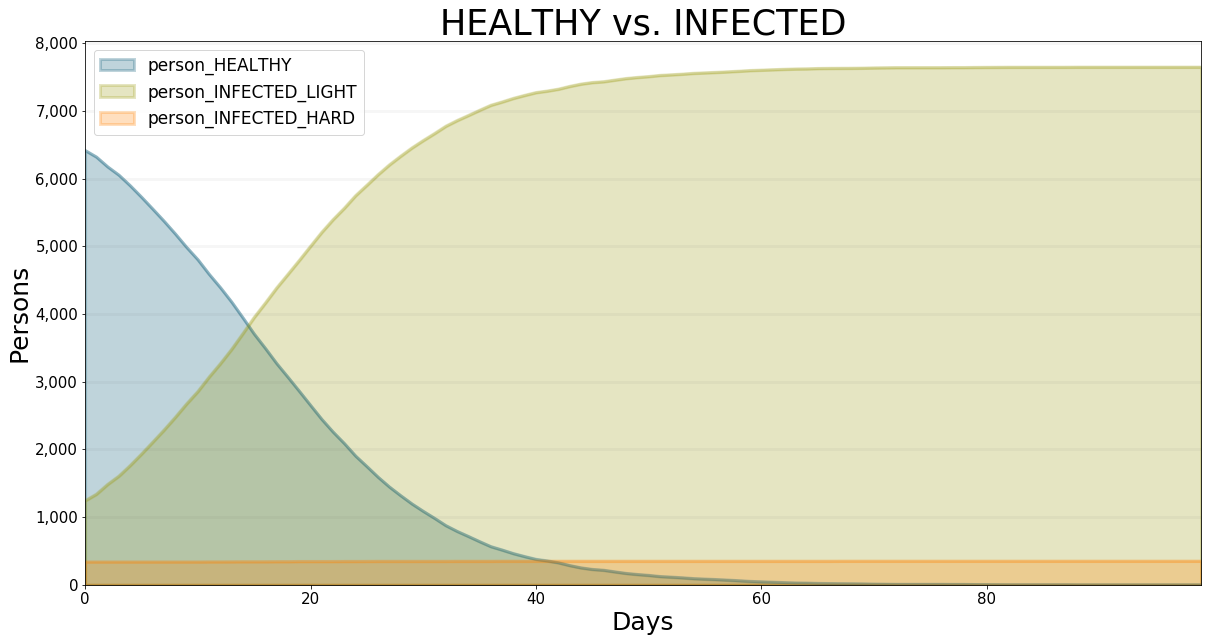

In [16]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="HEALTHY vs. INFECTED",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_states=["HEALTHY","INFECTED_LIGHT","INFECTED_HARD"],
    series_names={
        "person_HEALTHY":"Healthy",
        "person_INFECTED_LIGHT":"Infected with light symptoms",
        "person_INFECTED_HARD":"Infected with strong symptoms",
    },
    visualize_to_period = 100,
    progress_bar=True
    
)

In [17]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_states=["HEALTHY","INFECTED_HARD","INFECTED_LIGHT"],
    return_df=True,
    visualize_to_period = 30
)

,person_HEALTHY,person_INFECTED_LIGHT,person_INFECTED_HARD
t,,,
0,6419.0,1242,339
1,6322.0,1339,339
2,6177.0,1484,339
3,6054.0,1607,339
4,5898.0,1763,339
5,5729.0,1932,339
6,5553.0,2108,339
7,5374.0,2287,339
8,5186.0,2475,339


The second plot is the more important one. It helps us to figure out the number of persons an infected person infect per day. According to the plot

- describing plot
- plot shows how many people can one infected person infect per day

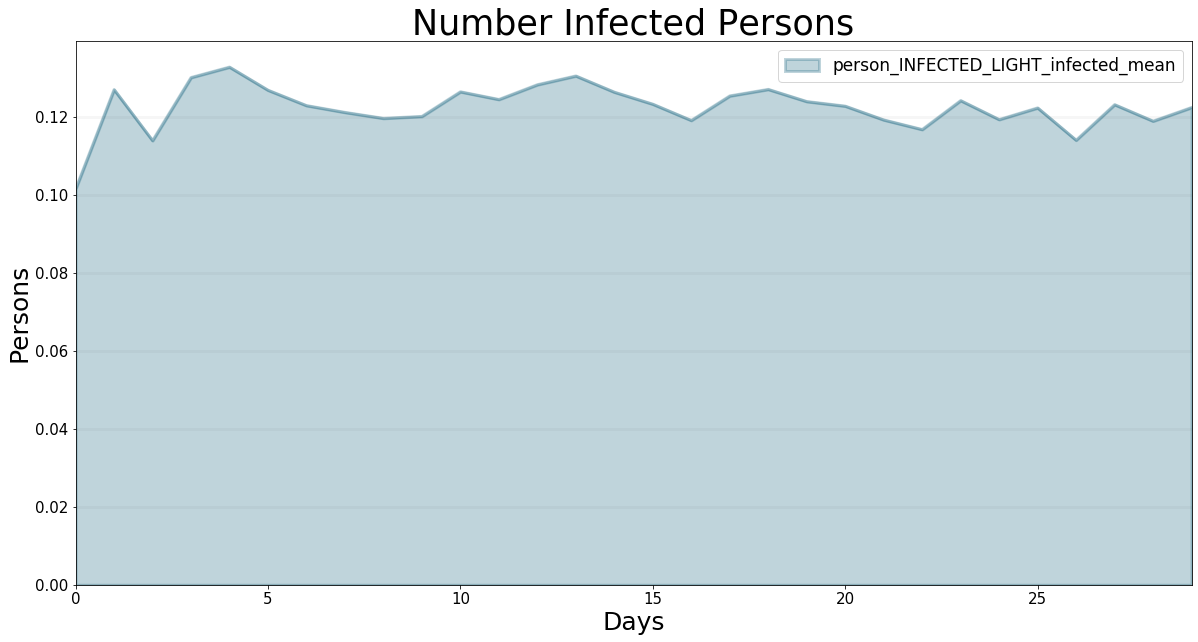

In [18]:
bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_properties=["infected"],
    agent_property_types=["mean"],
    agent_states=["INFECTED_LIGHT"],
    visualize_to_period = 30
)

- desribing plot in more detail by explaining the table

In [19]:
r0_df = bptk.plot_scenarios(
    scenario_managers=["Covid19"],
    kind="area",
    title="Number Infected Persons",
    x_label="Days",
    y_label="Persons",
    scenarios=["base"],
    agents=["person"],
    agent_properties=["infected"],
    agent_property_types=["mean"],
    agent_states=["INFECTED_LIGHT"],
    visualize_to_period = 30,
    return_df=True
)

In [20]:
r0_df

,person_INFECTED_LIGHT_infected_mean
t,
0,0.101449
1,0.126960
2,0.113881
3,0.130056
4,0.132728
5,0.126812
6,0.122865
7,0.121119
8,0.119596


- computing how many agents one infected agent infects over 20 days
- describing what the number means

In [21]:
r0_df.mean()*20

person_INFECTED_LIGHT_infected_mean    2.448413
dtype: float64